In [54]:
import pandas as pd
from datetime import date
import numpy as np
from sklearn.impute import SimpleImputer

In [55]:
chatterbox = pd.read_csv('employees.csv')

In [56]:
chatterbox.head(20)

,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,Status,Inactive_Date,Reporting_emp_1,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth
0,347,6,Myrl Bechtelar MD,Mr,Male,1,Married,24,12/8/1993,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Driver,1965
1,348,33,Francis Mraz,Mr,Male,1,Married,24,3/14/1995,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Driver,1973
2,349,53,Mr Emmet Blick Jr,Mr,Male,1,Married,23,1/27/1988,6/28/2021,Inactive,6/28/2021,\N,\N,Staff,Permanant,Buddhist,Account Clerk,1974
3,351,77,Mr Nelson Braun PhD,Ms,Female,4,Married,40,10/1/1999,1/31/2022,Inactive,1/31/2022,\N,\N,Staff,Permanant,Catholic,Purchasing Officer,1974
4,352,88,Maximillian Hand,Mr,Male,1,Married,7,1/26/2001,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Store Keeper,1980
5,353,155,Zena Nicolas,Mr,Male,1,Married,22,9/29/2003,\N,Inactive,8/31/2020,\N,\N,Staff,Permanant,Buddhist,Technical Officer,1962
6,354,181,Coralie Bernhard,Mr,Male,1,Married,22,11/10/2003,0000-00-00,Active,0000-00-00,945,\N,Staff,Permanant,Buddhist,Technical Officer,1969
7,355,192,Josh Roob,Mr,Male,1,Married,126,2/16/2004,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Project Coordinator,1981
8,356,283,Ernest Upton,Ms,Female,1,Single,23,6/1/2005,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Account Clerk,1974
9,359,529,Sydney Oberbrunner,Mr,Male,1,Married,41,7/1/2006,1/31/2022,Inactive,1/31/2022,\N,\N,Staff,Permanant,Buddhist,Electrician,1967


In [57]:
chatterbox.columns

Index(['Employee_No', 'Employee_Code', 'Name', 'Title', 'Gender',
       'Religion_ID', 'Marital_Status', 'Designation_ID', 'Date_Joined',
       'Date_Resigned', 'Status', 'Inactive_Date', 'Reporting_emp_1',
       'Reporting_emp_2', 'Employment_Category', 'Employment_Type', 'Religion',
       'Designation', 'Year_of_Birth'],
      dtype='object')

In [58]:
chatterbox.dtypes


Employee_No             int64
Employee_Code           int64
Name                   object
Title                  object
Gender                 object
Religion_ID             int64
Marital_Status         object
Designation_ID          int64
Date_Joined            object
Date_Resigned          object
Status                 object
Inactive_Date          object
Reporting_emp_1        object
Reporting_emp_2        object
Employment_Category    object
Employment_Type        object
Religion               object
Designation            object
Year_of_Birth          object
dtype: object

In [59]:
chatterbox[['Employee_No','Year_of_Birth']]

,Employee_No,Year_of_Birth
0,347,1965
1,348,1973
2,349,1974
3,351,1974
4,352,1980
...,...,...
992,2836,1993
993,2890,1994
994,2972,1997
995,2973,1990


In [60]:
incorrect_values = (chatterbox['Year_of_Birth'] == "0000")
chatterbox['Year_of_Birth'] = pd.to_numeric(chatterbox['Year_of_Birth'], errors='coerce')
mode_year = chatterbox['Year_of_Birth'].mode()
if not mode_year.empty:
    mode1_year = int(round(mode_year.iloc[0]))
    
else:
    mode1_year = 0

chatterbox['Year_of_Birth'].fillna(mode1_year, inplace=True)

In [61]:
chatterbox['Year_of_Birth'] = chatterbox['Year_of_Birth'].astype('int64')
chatterbox['Date_Joined'] = chatterbox['Date_Joined'].astype('datetime64')

In [62]:
chatterbox.isnull().sum()

Employee_No             0
Employee_Code           0
Name                    0
Title                   0
Gender                  0
Religion_ID             0
Marital_Status         67
Designation_ID          0
Date_Joined             0
Date_Resigned           0
Status                  0
Inactive_Date           0
Reporting_emp_1         0
Reporting_emp_2         0
Employment_Category     0
Employment_Type         0
Religion                0
Designation             0
Year_of_Birth           0
dtype: int64

In [63]:
chatterbox[['Employee_No','Marital_Status']]

,Employee_No,Marital_Status
0,347,Married
1,348,Married
2,349,Married
3,351,Married
4,352,Married
...,...,...
992,2836,Single
993,2890,Single
994,2972,Single
995,2973,Single


In [64]:
grouped_data = chatterbox.groupby(chatterbox['Year_of_Birth'] < 1980)
def fill_missing_marital_status(group):
    group['Marital_Status'].fillna(group['Marital_Status'].mode().iloc[0], inplace=True)
    return group
chatterbox = grouped_data.apply(fill_missing_marital_status)
chatterbox.isnull().sum()

Employee_No            0
Employee_Code          0
Name                   0
Title                  0
Gender                 0
Religion_ID            0
Marital_Status         0
Designation_ID         0
Date_Joined            0
Date_Resigned          0
Status                 0
Inactive_Date          0
Reporting_emp_1        0
Reporting_emp_2        0
Employment_Category    0
Employment_Type        0
Religion               0
Designation            0
Year_of_Birth          0
dtype: int64

In [65]:
chatterbox[['Marital_Status','Year_of_Birth']].head(20)

,Marital_Status,Year_of_Birth
0,Married,1965
1,Married,1973
2,Married,1974
3,Married,1974
4,Married,1980
5,Married,1962
6,Married,1969
7,Married,1981
8,Single,1974
9,Married,1967


In [66]:
chatterbox.dtypes

Employee_No                     int64
Employee_Code                   int64
Name                           object
Title                          object
Gender                         object
Religion_ID                     int64
Marital_Status                 object
Designation_ID                  int64
Date_Joined            datetime64[ns]
Date_Resigned                  object
Status                         object
Inactive_Date                  object
Reporting_emp_1                object
Reporting_emp_2                object
Employment_Category            object
Employment_Type                object
Religion                       object
Designation                    object
Year_of_Birth                   int64
dtype: object

In [67]:
for index, row in chatterbox.iterrows():
    status = row['Status']
    date_resigned = row['Date_Resigned']
    inactive_date = row['Inactive_Date']
    
    if status == 'Inactive' and pd.to_datetime(date_resigned, errors='coerce', format='%m/%d/%Y', exact=False).year <= 0:
        inactive_date_parsed = pd.to_datetime(inactive_date, errors='coerce', format='%m/%d/%Y', exact=False)
        if inactive_date_parsed.year > 0:
            chatterbox.at[index, 'Date_Resigned'] = inactive_date_parsed.strftime('%m/%d/%Y')
    
    elif status == 'Active':
        chatterbox.at[index, 'Date_Resigned'] = np.nan
        chatterbox.at[index, 'Inactive_Date'] = np.nan
           
    if date_resigned == '0000-00-00':
        chatterbox.at[index, 'Date_Resigned'] = np.nan
    if inactive_date == '0000-00-00':
        chatterbox.at[index, 'Inactive_Date'] = np.nan

chatterbox = chatterbox.fillna('\\N')        

In [68]:
chatterbox['Date_Resigned'] = chatterbox['Inactive_Date'].copy()


In [69]:
chatterbox = chatterbox.drop('Reporting_emp_2', axis=1)

In [70]:
chatterbox = chatterbox.drop('Inactive_Date', axis=1)

In [53]:
chatterbox.to_csv('employee_preprocess_200308F.csv', index =False)

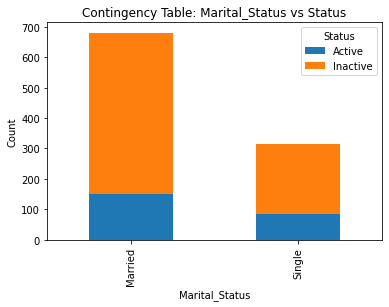

Status,Active,Inactive
Marital_Status,,
Married,150,531
Single,83,233


In [80]:
import matplotlib.pyplot as plt
df = pd.read_csv('employee_preprocess_200308F.csv')

# Select the "Marital_Status" and "Status" columns
marital_status = df['Marital_Status']
status = df['Status']

# Create a contingency table using crosstab
contingency_table = pd.crosstab(marital_status, status)



contingency_table.plot(kind='bar', stacked=True)

# Set plot labels and title
plt.xlabel('Marital_Status')
plt.ylabel('Count')
plt.title('Contingency Table: Marital_Status vs Status')

# Display the plot
plt.show()
# Print the contingency table
contingency_table

c:\users\kobinath\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


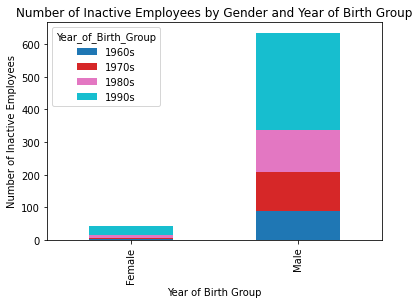

In [85]:
inactive_df = df[df['Status'] == 'Inactive']

# Group the data by gender and year of birth in 10-year intervals
inactive_df['Year_of_Birth_Group'] = pd.cut(inactive_df['Year_of_Birth'], bins=range(1960, 2001, 10), labels=['1960s', '1970s', '1980s', '1990s'], right=False)

# Group the data by gender and year of birth group
grouped_df = inactive_df.groupby(['Gender', 'Year_of_Birth_Group']).size().unstack()

# Plot the bar chart with color-coded groups
grouped_df.plot(kind='bar', stacked=True, colormap='tab10')

# Set the labels and title
plt.xlabel('Year of Birth Group')
plt.ylabel('Number of Inactive Employees')
plt.title('Number of Inactive Employees by Gender and Year of Birth Group')

# Display the plot
plt.show()

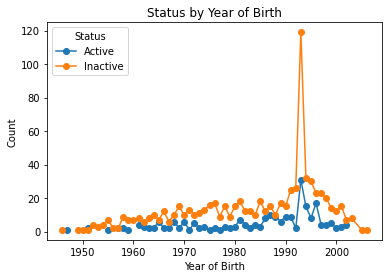

In [86]:
filtered_df = df[['Year_of_Birth', 'Status']]

# Group the data by year of birth and count the occurrences of each status
grouped_df = filtered_df.groupby('Year_of_Birth')['Status'].value_counts().unstack()

# Plot the line graph
grouped_df.plot(kind='line', marker='o')

# Set the labels and title
plt.xlabel('Year of Birth')
plt.ylabel('Count')
plt.title('Status by Year of Birth')

# Display the plot
plt.show()

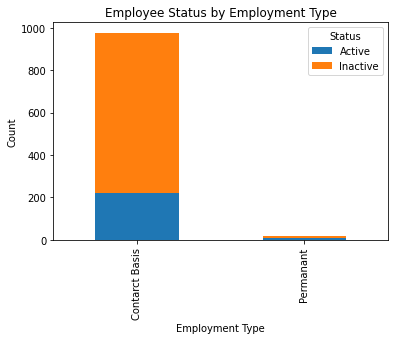

In [87]:
count_df = df.groupby(['Employment_Type', 'Status']).size().unstack()

# Create the bar chart
count_df.plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.title('Employee Status by Employment Type')

# Display the chart
plt.show()

In [88]:
contingency_table = pd.crosstab(df['Employment_Type'], df['Status'])

# Display the contingency table
print(contingency_table)

Status           Active  Inactive
Employment_Type                  
Contarct Basis      223       754
Permanant            10        10


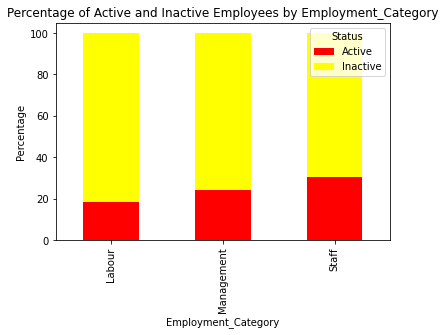

In [98]:
designation_status_counts = df.groupby(['Employment_Category', 'Status']).size().unstack()

# Calculate the percentage of each employment category
total_counts = designation_status_counts.sum(axis=1)
designation_status_percentages = designation_status_counts.div(total_counts, axis=0) * 100

# Plot the bar chart
designation_status_percentages.plot(kind='bar', stacked=True, color=['red', 'yellow'])

# Set the plot labels and title
plt.xlabel('Employment_Category')
plt.ylabel('Percentage')
plt.title('Percentage of Active and Inactive Employees by Employment_Category')

# Display the plot
plt.show()

In [96]:
contingency_table = pd.crosstab(df['Employment_Category'], df['Status'])

# Display the contingency table
print(contingency_table)

Status               Active  Inactive
Employment_Category                  
Labour                  104       464
Management                6        19
Staff                   123       281


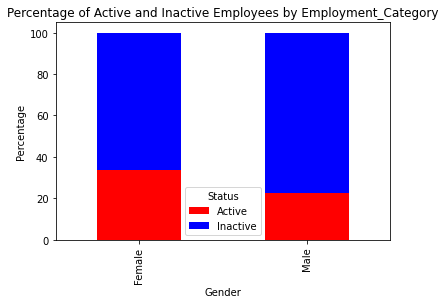

In [101]:
designation_status_counts = df.groupby(['Gender', 'Status']).size().unstack()

# Calculate the percentage of each employment category
total_counts = designation_status_counts.sum(axis=1)
designation_status_percentages = designation_status_counts.div(total_counts, axis=0) * 100

# Plot the bar chart
designation_status_percentages.plot(kind='bar', stacked=True, color=['red', 'blue'])

# Set the plot labels and title
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Percentage of Active and Inactive Employees by Employment_Category')

# Display the plot
plt.show()

In [100]:
contingency_table = pd.crosstab(df['Gender'], df['Status'])

# Display the contingency table
print(contingency_table)

Status  Active  Inactive
Gender                  
Female      22        43
Male       211       721
